In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

In [59]:
df = pd.read_csv('data/events.csv', low_memory=False)

In [60]:
# veamos el shape que tiene el dataset
df.shape

(1011288, 23)

In [61]:
df.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [63]:
# veamos los tipos de las variables
df.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

Evidentemente son todos strings.

# Data cleaning

***
## Fechas

Empecemos por convertir los timestamps en algo legible

In [64]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [65]:
# separemos las cosas para que quede algo manejable; no tiene sentido tener el timestamp todo junto
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

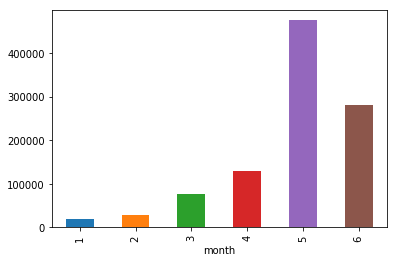

In [73]:
df.groupby('month').count()['person'].plot(kind='bar')

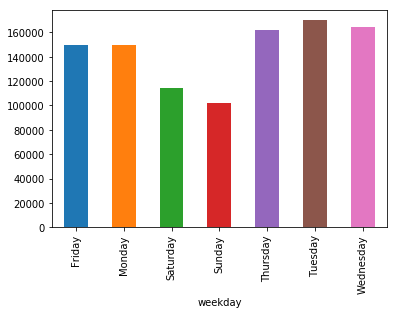

In [74]:
df.groupby('weekday').count()['person'].plot(kind='bar')

Se puede observar que hay menos trafico los fines de semana. Fuera de eso, los niveles se mantienen similares.

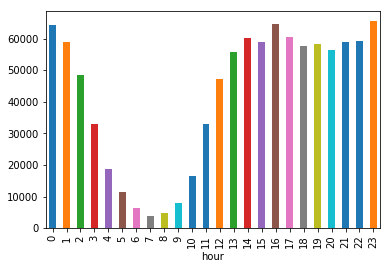

In [80]:
df.groupby('hour').count()['person'].plot(kind='bar')

***
## Event

In [7]:
len(df.event.unique())

11

In [8]:
for ev in df.event.unique():
    print(ev)

ad campaign hit
visited site
viewed product
checkout
generic listing
search engine hit
brand listing
searched products
conversion
staticpage
lead


***
## Person

In [9]:
len(df.person.unique())

27624

In [10]:
df['person'].head()

0    0004b0a2
1    0004b0a2
2    0004b0a2
3    0004b0a2
4    0006a21a
Name: person, dtype: object

Al parecer esto es un `id` de persona.

***
## url

In [11]:
len(df.url.unique())

228

In [12]:
df['url'].head()

0    /comprar/iphone/iphone-5s
1                          NaN
2                          NaN
3                          NaN
4                          NaN
Name: url, dtype: object

Habra muchos `NaNs`?

In [13]:
cant_nans = len(df) - df['url'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 928532
porcentaje nans: 0.9181677227456472


`TODO` pensar en esto. Hay un 90% de nans en esta columna. Por ahi es porque no corresponde en todos los casos, pero de todas formas es para revisar.

***
## sku

In [14]:
len(df.sku.unique())

3886

In [15]:
df['sku'].head()

0      NaN
1      NaN
2     2694
3     2694
4    15338
Name: sku, dtype: object

Habra muchos `NaNs`?

In [16]:
cant_nans = len(df) - df['sku'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 447450
porcentaje nans: 0.4424555616204286


`TODO` pensar en esto.

***
## model

In [17]:
len(df.model.unique())

203

In [18]:
df['model'].head()

0                  NaN
1                  NaN
2            iPhone 5s
3            iPhone 5s
4    Samsung Galaxy S8
Name: model, dtype: object

***
## condition

In [19]:
len(df.condition.unique())

6

In [20]:
for ev in df.condition.unique():
    print(ev)

nan
Bom
Muito Bom
Excelente
Bom - Sem Touch ID
Novo


Habra muchos `NaNs`?

In [21]:
cant_nans = len(df) - df['condition'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 447452
porcentaje nans: 0.442457539296422


`TODO` pensar en esto. Hay un 45% de nans en esta columna. No es tan tragico como antes, pero no es despreciable tampoco.

***
## model

In [22]:
len(df.model.unique())

203

In [23]:
df['model'].head()

0                  NaN
1                  NaN
2            iPhone 5s
3            iPhone 5s
4    Samsung Galaxy S8
Name: model, dtype: object

***
## storage

In [24]:
len(df.storage.unique())

9

In [25]:
for ev in df.storage.unique():
    print(ev)

nan
32GB
64GB
256GB
16GB
8GB
128GB
4GB
512MB


Habra muchos `NaNs`?

In [26]:
cant_nans = len(df) - df['storage'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 447452
porcentaje nans: 0.442457539296422


`TODO` pensar en esto. Hay un 45% de nans en esta columna. No es tan tragico como antes, pero no es despreciable tampoco.

`OBSERVACION!` Se esta repitiendo el porcentaje de nans. Podriamos suponer que la informacion faltante es de los mismos registros.

***
## Color

In [27]:
len(df.color.unique())

64

Habra `NaNs`?

In [28]:
cant_nans = len(df) - df['color'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 447452
porcentaje nans: 0.442457539296422


`TODO` pensar en esto. Hay un 45% de nans en esta columna. No es tan tragico como antes, pero no es despreciable tampoco.

***
## skus

Probablemente la correlacion sea alta con `sku`. Si miramos los datos que nos dan, tienen definiciones un tanto similares:<br>
    **sku**: Identificador de producto relacionado al evento.<br>
    **skus**: Identificadores de productos visualizados en el evento.

In [29]:
len(df.color.unique())

64

***
## search term

In [30]:
len(df.search_term.unique())

5852

Habra muchos `NaNs`?

In [31]:
cant_nans = len(df) - df['search_term'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 962321
porcentaje nans: 0.951579569815918


`ALERT!` Uhh, muuchos nans!

***
## static page

In [32]:
len(df.staticpage.unique())

15

In [33]:
for ev in df.staticpage.unique():
    print(ev)

nan
how-to-buy
trust-trocafone
Quiosks
FaqEcommerce
AboutUs
Conditions
TermsAndConditionsEcommerce
CustomerService
galaxy-s8
how-to-sell
TermsAndConditionsReturnEcommerce
club-trocafone
black_friday
PrivacyEcommerce


***
Habra muchos `NaNs`?

In [34]:
cant_nans = len(df) - df['staticpage'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 1007690
porcentaje nans: 0.9964421608878974


***
## campaign source

In [35]:
len(df.campaign_source.unique())

25

In [36]:
for ev in df.campaign_source.unique():
    print(ev)

criteo
nan
google
FacebookAds
zanox
rtbhouse
voxus
bing
afilio
emblue
mercadopago
FacebookSocial
datacrush
indexa
buscape
Facebook
rakuten
blog
yotpo
manifest
afiliado
MARKETING SOCIAL
socialmedia
Google Social
onsite


Habra muchos `NaNs`?

In [37]:
cant_nans = len(df) - df['campaign_source'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 928492
porcentaje nans: 0.9181281692257794


***
## search engine

In [38]:
len(df.search_engine.unique())

5

In [39]:
for ev in df.search_engine.unique():
    print(ev)

nan
Google
Bing
Yahoo
Ask


Habra muchos `NaNs`?

In [40]:
cant_nans = len(df) - df['search_engine'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 960331
porcentaje nans: 0.9496117822024982


***
## channel

In [41]:
len(df.channel.unique())

8

In [42]:
for ev in df.channel.unique():
    print(ev)

nan
Paid
Organic
Direct
Social
Referral
Email
Unknown


Habra muchos `NaNs`?

In [43]:
cant_nans = len(df) - df['channel'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 923910
porcentaje nans: 0.9135973135249306


***
## new vs returning

In [44]:
len(df.new_vs_returning.unique())

3

In [45]:
for ev in df.new_vs_returning.unique():
    print(ev)

nan
New
Returning


Habra muchos `NaNs`?

In [46]:
cant_nans = len(df) - df['new_vs_returning'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 923910
porcentaje nans: 0.9135973135249306


***
## city

In [47]:
len(df.city.unique())

1940

In [51]:
cities = df.city.unique()

In [48]:
df.city.head()

0           NaN
1    Camaragibe
2           NaN
3           NaN
4           NaN
Name: city, dtype: object

Habra muchos `NaNs`?

In [6]:
cant_nans = len(df) - df['city'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 923910
porcentaje nans: 0.9135973135249306


#### Mapas related
Consigamos las coordenadas de las ciudades para poder graficarlas en un mapa y ver visualmente donde estan los clientes. Se podria dibujar circulos con radio en funcion de la cantidad de compras del lugar, para tener una idea de la importancia de cada lugar para el estudio de mercado. 

In [28]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")

In [ ]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
d = dict(zip(cities, pd.Series(cities).apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))))

In [49]:
print(d)

{nan: (34.220389, 70.3800314), 'Unknown': (25.0387049, -77.2941536448326), 'Ribeirão Preto': (-21.178333, -47.8066671), 'Camaragibe': (-8.0213832, -34.9810768), 'Rio de Janeiro': (-22.9110137, -43.2093727)}


In [57]:
df.to_csv('data/with_city_coords.csv')

***
## region

In [58]:
len(df.region.unique())

94

In [59]:
df.region.head()

0           NaN
1    Pernambuco
2           NaN
3           NaN
4           NaN
Name: region, dtype: object

Habra muchos `NaNs`?

In [60]:
cant_nans = len(df) - df['region'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 923910
porcentaje nans: 0.9135973135249306


#### Mapas related

***
## country

In [61]:
len(df.country.unique())

47

In [62]:
for ev in df.country.unique():
    print(ev)

nan
Brazil
Unknown
United States
Argentina
Russia
Canada
Netherlands
France
Paraguay
Mexico
Mozambique
Philippines
Israel
Bangladesh
Italy
United Kingdom
Angola
Portugal
Uzbekistan
Venezuela
Belize
Colombia
China
French Guiana
Algeria
Japan
India
Dominican Republic
Ireland
Zimbabwe
Turkey
Germany
Sri Lanka
Rwanda
Romania
Saudi Arabia
Morocco
Uruguay
Switzerland
Cape Verde
Denmark
Peru
Guadeloupe
Poland
South Africa
Spain


***
## device type

In [63]:
len(df.device_type.unique())

5

In [64]:
for ev in df.device_type.unique():
    print(ev)

nan
Smartphone
Computer
Tablet
Unknown


Habra muchos `NaNs`?

In [65]:
cant_nans = len(df) - df['device_type'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 923910
porcentaje nans: 0.9135973135249306


Pasa aca, y no es el unico lugar, de que hay tanto `nan` como `unknown`. Hay que ver si el valor se puede deducir de algun otro dato, o de lo contrario, como habra que manejar este tema.  
No es del todo incorrecto. Porque `nan` indicaria que no corresponde, y `unknown` que si corresponde, pero se desconoce el valor.

***
## screen resolution

In [66]:
len(df.screen_resolution.unique())

283

Habra muchos `NaNs`?

In [67]:
cant_nans = len(df) - df['screen_resolution'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 923910
porcentaje nans: 0.9135973135249306


***
## os version

In [68]:
len(df.operating_system_version.unique())

122

Habra muchos `NaNs`?

In [69]:
cant_nans = len(df) - df['operating_system_version'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 923910
porcentaje nans: 0.9135973135249306


***
## browser version

In [70]:
len(df.browser_version.unique())

344

Habra muchos `NaNs`?

In [71]:
cant_nans = len(df) - df['browser_version'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 923910
porcentaje nans: 0.9135973135249306
